In [1]:
import matplotlib.pyplot as plt
from mlrose_hiive import TSPGenerator,OneMax
import mlrose_hiive as mlrose
import time
from src.runner import runner

### setting up runners for each algorithm

In [2]:

tsp = TSPGenerator().generate(seed=19, number_of_cities=50)

bitstring = mlrose.DiscreteOpt(length = 100, fitness_fn = OneMax(), maximize = True, max_val = 2)


wallclock_list=[]
fitness_list=[]
models=["RHC","SA","GA","MIMIC"]
problem=bitstring

for model in models:
    
    if model == "RHC":
        obj=runner(problem,'RHC')
    elif model == "SA":
        obj=runner(problem,'SA')
    elif model == "GA":
        obj=runner(problem,'GA')
    elif model == "MIMIC":
        obj=runner(problem,'MIMIC')

    start_time = time.time()
    _,df_run_curves = obj.run()
    wallclock = time.time()-start_time
    wallclock_list.append(wallclock)
    fitness_list.append(df_run_curves['Fitness'].max())

print(fitness_list)
print(wallclock_list)

[99.0, 96.0, 100.0, 80.0]
[0.7791111469268799, 0.01517629623413086, 0.1113741397857666, 0.4852409362792969]


### TSP problem

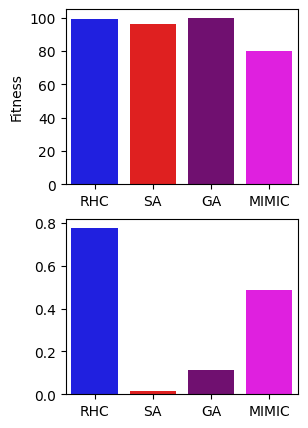

In [3]:
import seaborn as sns
fig = plt.figure(figsize=(3,5))
plt.subplots_adjust(wspace=2) 


colors = ['blue', 'red','purple','magenta']

ax1=fig.add_subplot(2,1,1)
sns.barplot(x=models,y=fitness_list,palette=colors)
ax2=fig.add_subplot(2,1,2)
sns.barplot(x=models,y=wallclock_list,palette=colors)

# ax2=fig.add_subplot(1,2,2)
# sns.lineplot(x=neurons,y=accuracy3, marker='o',label='Case 1')
# sns.lineplot(x=neurons,y=accuracy4, marker='o',label='Case 2')

plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})


# ax1.set_ylim(0.7, 0.9)
# ax1.set_xlim(0, 5)
# ax2.set_ylim(0.7, 0.9)
# ax2.set_xlim(0, 60)

# ax1.set_xlabel('Number of layers')
ax1.set_ylabel('Fitness')
plt.show()

### bit string problem

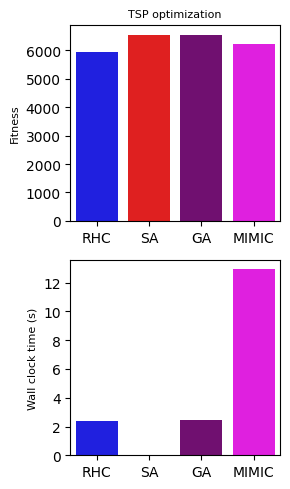

In [4]:

wallclock_list=[]
fitness_list=[]
models=["RHC","SA","GA","MIMIC"]
problem=tsp

for model in models:
    
    if model == "RHC":
        obj=runner(problem,'RHC')
    elif model == "SA":
        obj=runner(problem,'SA')
    elif model == "GA":
        obj=runner(problem,'GA')
    elif model == "MIMIC":
        obj=runner(problem,'MIMIC')

    start_time = time.time()
    _,df_run_curves = obj.run()
    wallclock = time.time()-start_time
    wallclock_list.append(wallclock)
    fitness_list.append(50*250-df_run_curves['Fitness'].max())


import seaborn as sns
fig = plt.figure(figsize=(3,5))
plt.subplots_adjust(wspace=2) 


colors = ['blue', 'red','purple','magenta']

ax1=fig.add_subplot(2,1,1)
sns.barplot(x=models,y=fitness_list,palette=colors)
ax2=fig.add_subplot(2,1,2)
sns.barplot(x=models,y=wallclock_list,palette=colors)

# ax2=fig.add_subplot(1,2,2)
# sns.lineplot(x=neurons,y=accuracy3, marker='o',label='Case 1')
# sns.lineplot(x=neurons,y=accuracy4, marker='o',label='Case 2')

plt.rcParams.update({
    'font.size': 10,          # General font size
    'axes.titlesize': 8,     # Font size for titles
    'axes.labelsize': 8,     # Font size for x and y labels
    # 'xtick.labelsize': 8,    # Font size for x-axis tick labels
    # 'ytick.labelsize': 8,    # Font size for y-axis tick labels
    'legend.fontsize': 8     # Font size for legend
})


# ax1.set_ylim(0.7, 0.9)
# ax1.set_xlim(0, 5)
# ax2.set_ylim(0.7, 0.9)
# ax2.set_xlim(0, 60)

# ax1.set_xlabel('Number of layers')
ax1.set_ylabel('Fitness')

# ax2.set_xlabel('Number of neurons')
ax2.set_ylabel('Wall clock time (s)')

# ax1.legend(loc='lower right')
# ax2.legend(loc='lower right')
ax1.set_title('TSP optimization')
# ax2.set_title('Case 2')

plt.tight_layout()

plt.savefig('figs/comp_performance1.pdf')
plt.show()
